In [2]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def orders(num_customerBase):
    return 0.2123*num_customerBase

def G(m, M):
    p= 0.8*(1.25-(np.e)**(-m/5))
    return 38/40 + 1/40*((0.45+p)**0.3+ (M/5+1)**0.05), p

## Have to find optimal Mi, mi to have G>=1 and minimal diff. between INR available

In [71]:
co= 1.02e6

Mo= 5e6
profit_margin= 0.2
AOV= 300
intial_INR= 15e6
dmap={
    'm':[],
    'M':[],
    'INR_30thDay':[],
    'customerBase_30thDay':[],
    'p':[],
    'g':[]
}

for m in np.linspace(0, 10, 20):
    for M in np.linspace(0, 10, 20):
        if (m*1e6+M*1e6+Mo)> intial_INR:
            break
        customerBase= co
        INR_day= intial_INR
        flag=True
        for i in range(30):
            g, p= G(m, M)
            if g<=1:
                flag=False
                break

            customerBase= int(g*customerBase)
            total_orders= orders(customerBase)
            total_money= total_orders*AOV
            profit= profit_margin*total_money

            INR_day_nxt= INR_day-Mo-(m*1e6)-(M*1e6)+profit
            if INR_day_nxt<INR_day:
                flag=False
                break
            INR_day=INR_day_nxt
        
        if flag:
            print(g, m, M, p, customerBase, INR_day)
            dmap['m'].append(m)
            dmap['M'].append(M)
            dmap['INR_30thDay'].append(INR_day)
            dmap['customerBase_30thDay'].append(customerBase)
            dmap['p'].append(p)
            dmap['g'].append(g)
        

1.0000408903750169 2.1052631578947367 3.1578947368421053 0.4749155556233278 1021230 97130913.12789477
1.0001211026529093 2.1052631578947367 3.6842105263157894 0.4749155556233278 1023690 81827139.38368425
1.0001968231391045 2.1052631578947367 4.2105263157894735 0.4749155556233278 1026023 66497265.477473676
1.0002685395340754 2.1052631578947367 4.7368421052631575 0.4749155556233278 1028234 51143380.44126313
1.0003366636373112 2.1052631578947367 5.263157894736842 0.4749155556233278 1030337 35767726.16305263
1.0004015463747276 2.1052631578947367 5.789473684210526 0.4749155556233278 1032345 20373206.906842135
1.0000689374481975 2.631578947368421 1.0526315789473684 0.5273779888790147 1022100 144671106.11052647
1.0001743845419722 2.631578947368421 1.5789473684210527 0.5273779888790147 1025335 129519551.46631585
1.0002721028929376 2.631578947368421 2.1052631578947367 0.5273779888790147 1028343 114322471.21010536
1.0003631724708026 2.631578947368421 2.631578947368421 0.5273779888790147 1031156 

In [25]:
dmap['g'].index(max(dmap['g']))

68

In [26]:
m= dmap['m'][68]
M= dmap['M'][68]

In [27]:
customerBase= co
INR_day= intial_INR
INR_list, customerBase_list=[INR_day], [customerBase]
flag=True
day_list=[0]
total_order_list=[]
for i in range(30):
    g, p= G(m, M)
    if g<=1:
        flag=False
        break

    customerBase= int(g*customerBase)
    total_orders= int(orders(customerBase))
    total_money= total_orders*AOV
    profit= profit_margin*total_money

    INR_day_nxt= INR_day-Mo-(m*1e6)-(M*1e6)+profit
    if INR_day_nxt<INR_day:
        flag=False
        break
    INR_day=INR_day_nxt
    INR_list.append(INR_day)
    customerBase_list.append(customerBase)
    day_list.append(i+1)
    total_order_list.append(total_orders)

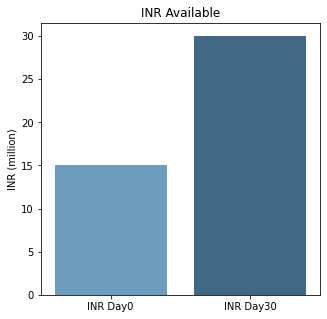

In [28]:
plt.figure(figsize=(5, 5))
sns.barplot(y=[INR_list[0]/1e6, INR_list[-1]/1e6], x=['INR Day0', 'INR Day30'],
               palette="Blues_d")

plt.title('INR Available')
plt.ylabel('INR (million)')
plt.show()

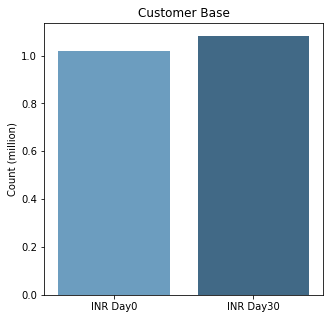

In [29]:
plt.figure(figsize=(5, 5))
sns.barplot(y=[customerBase_list[0]/1e6, customerBase_list[-1]/1e6], x=['INR Day0', 'INR Day30'],
               palette="Blues_d")

plt.title('Customer Base')
plt.ylabel('Count (million)')
plt.show()

In [31]:
dmap['p'][68]

0.8167360401476099

In [30]:
((customerBase_list[-1]- customerBase_list[0])/customerBase_list[0])*100, ((INR_list[-1]- INR_list[0])/INR_list[0])*100

(6.059313725490196, 100.18063157894761)

In [39]:
len(customerBase_list)

31

In [40]:
cb_prev= customerBase_list[:-1]
cb_next= customerBase_list[1:]

In [43]:
inr_prev= INR_list[:-1]
inr_next= INR_list[1:]

In [65]:
final_dmap={
    'day': day_list[1:],
    'Capital Available at the start of day': inr_prev,
    'Customer Base at the start of day': cb_prev,
    'm (million)':m,
    'p (probability)':p,
    'M (million)':M,
    'G':g,
    'Customer Base at end of the day': cb_next,
    'total orders':total_order_list,
    'Capital Available at end of the day':inr_next
}
df= pd.DataFrame(final_dmap)

In [66]:
df

,day,Capital Available at the start of day,Customer Base at the start of day,m (million),p (probability),M (million),G,Customer Base at end of the day,total orders,Capital Available at end of the day
0,1,1.500000e+07,1020000.0,7.368421,0.816736,0.526316,1.001963,1022002,216971,1.512352e+07
1,2,1.512352e+07,1022002.0,7.368421,0.816736,0.526316,1.001963,1024008,217396,1.527255e+07
2,3,1.527255e+07,1024008.0,7.368421,0.816736,0.526316,1.001963,1026018,217823,1.544719e+07
3,4,1.544719e+07,1026018.0,7.368421,0.816736,0.526316,1.001963,1028032,218251,1.564751e+07
4,5,1.564751e+07,1028032.0,7.368421,0.816736,0.526316,1.001963,1030050,218679,1.587352e+07
5,6,1.587352e+07,1030050.0,7.368421,0.816736,0.526316,1.001963,1032072,219108,1.612526e+07
6,7,1.612526e+07,1032072.0,7.368421,0.816736,0.526316,1.001963,1034098,219539,1.640286e+07
7,8,1.640286e+07,1034098.0,7.368421,0.816736,0.526316,1.001963,1036128,219969,1.670627e+07
8,9,1.670627e+07,1036128.0,7.368421,0.816736,0.526316,1.001963,1038162,220401,1.703559e+07
9,10,1.703559e+07,1038162.0,7.368421,0.816736,0.526316,1.001963,1040200,220834,1.739089e+07


In [67]:
df.to_csv('Strategy1_growth.csv', index=False)

In [9]:
l= (df['Customer Base at end of the day']-df['Customer Base at the start of day']).values

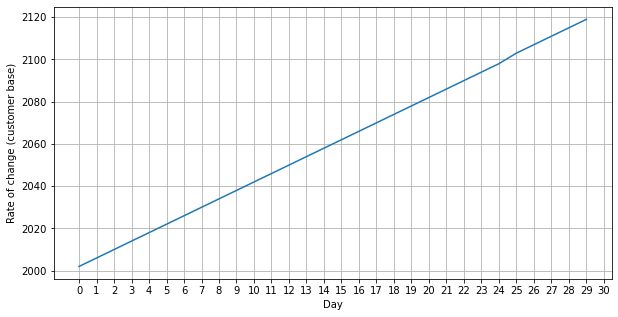

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(l)
plt.grid()
plt.xticks(list(range(31)))
plt.xlabel('Day')
plt.ylabel('Rate of change (customer base)')
plt.show()